# Machine Intelligence II (week 4) - Team MensaNord

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

In [1]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

### a)

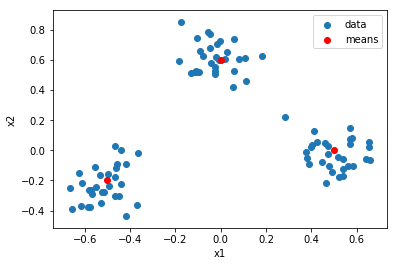

In [77]:
std = 0.1
means = np.array([[-0.5, -0.2], [0, 0.6], [0.5, 0]])

num_samples_per_mean = 30
num_samples = len(means) * num_samples_per_mean

x = np.vstack([np.random.normal(mean, std, size=[num_samples_per_mean, 2]) for mean in means])

plt.scatter(x[:, 0], x[:, 1], label='data')
plt.scatter(means[:, 0], means[:, 1], c='r', label='means')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

### b)

In [78]:
def rbf_kernel(x_alpha, x_beta, sigma=1):
    return np.exp(-np.linalg.norm(x_alpha - x_beta)**2 / (2 * sigma**2))

rbf_kernel(x[0], x[1]), rbf_kernel(x[0], x[-1])

(0.96158205269748309, 0.58406120096400671)

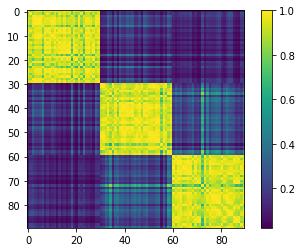

In [79]:
kernel_matrix = np.zeros((num_samples, num_samples))

for (i, j), value in np.ndenumerate(kernel_matrix):
    kernel_matrix[i, j] = rbf_kernel(x[i], x[j], sigma=0.5)
    
plt.imshow(kernel_matrix, interpolation='none')
plt.colorbar()

In [80]:
np.mean(kernel_matrix)

0.43266344120507744

In [81]:
# Normalize kernel matrix to zero mean.
normalized_kernel_matrix = np.zeros_like(kernel_matrix)

for (i, j), value in np.ndenumerate(kernel_matrix):
    normalized_kernel_matrix[i, j] = kernel_matrix[i, j] - 1 / num_samples * np.sum(kernel_matrix[i]) - 1 / num_samples * np.sum(kernel_matrix[:, j]) + 1 / num_samples**2 * np.sum(kernel_matrix)
    
np.mean(normalized_kernel_matrix)

-3.9255293117610474e-17

In [82]:
# Solve eigenvalue problem.
from scipy.linalg import eig
evals, evecs = eig(normalized_kernel_matrix)
evecs = evecs.T  # make each row one eigenvector

In [83]:
# Normalize eigenvectors to unit length in feature space.
normalized_evecs = evecs.copy()
for evec, val in zip(normalized_evecs, evals):
    evec /= np.sqrt(num_samples * val) * np.linalg.norm(evec)

### c)

In [115]:
grids_pc_values = []  # one grid for each PC, containing the projected values of the test points for this PC

grid_x = np.linspace(-0.8, 0.8, 10)
grid_y = np.linspace(-0.6, 1, 10)

for evec in evecs[:8]:
    grid = np.zeros((len(grid_x), len(grid_y)))

    for (i, j), _ in np.ndenumerate(grid):
        vec = np.array([grid_x[i], grid_y[j]])

        for beta in range(num_samples):
            grid[i, j] += evec[beta] * (rbf_kernel(x[beta], vec) - 1 / num_samples * np.sum(kernel_matrix[beta]) - 1 / num_samples * np.sum([rbf_kernel(x_vec, vec) for x_vec in x]) + 1 / num_samples**2 * np.sum(kernel_matrix))

    grids_pc_values.append(grid)

/Users/d068730/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: ComplexWarning: Casting complex values to real discards the imaginary part


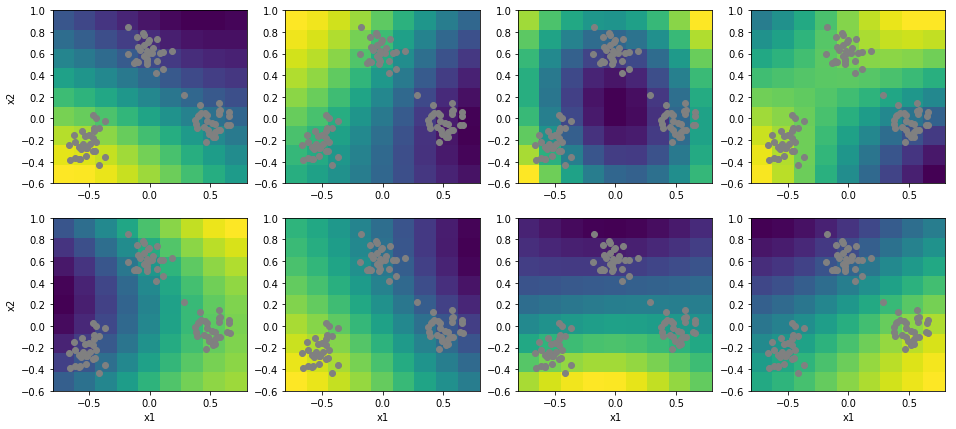

In [126]:
fig, axes = plt.subplots(2, 4, figsize=(16, 7))

for ((i, j), ax), grid in zip(np.ndenumerate(axes), grids_pc_values):
    plt.sca(ax)
    plt.pcolor(grid_x, grid_y, grid)
    plt.scatter(x[:, 0], x[:, 1], c='gray')
    
    if i == 1:
        plt.xlabel('x1')
        
    if j == 0:
        plt.ylabel('x2')

Each of the first 8 PCs (visualized in the 8 plots above) has a gradient-like structure in the input space. For example, the first PC (top left) seems like a linear gradient from bottom left to top right. 

### d)

Kernel-PCA can be used in all cases where the data points in the original space are not distributed "linearly", i.e. the main variation is not along a line in the space. For example, if the data points are in the form of a parabola or circle, a Kernel PCA can help to transform the data into another vector space, where the principal components (i.e. the directions of variation) are easier to find.

One example use case of Kernel-PCA is image de-noising (http://citeseer.ist.psu.edu/old/mika99kernel.html).